In [1]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# HIDDEN
def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

In [20]:
sp = pd.read_csv('health_spending.csv')
health = sp.iloc[:, [1, -4]].dropna().rename(columns={'2016': 'healthcare'})
health

,Country Code,healthcare
1,AFG,57.25
2,AGO,95.22
3,ALB,271.54
...,...,...
261,ZAF,428.18
262,ZMB,56.54
263,ZWE,93.94


In [21]:
li = pd.read_csv('life_exp.csv')
life = li.iloc[:, [1, -4]].dropna().rename(columns={'2016': 'life_exp'})
life

,Country Code,life_exp
0,ABW,75.87
1,AFG,63.67
2,AGO,61.55
...,...,...
261,ZAF,62.77
262,ZMB,61.87
263,ZWE,61.16


In [23]:
df = health.merge(life, on='Country Code')
df

,Country Code,healthcare,life_exp
0,AFG,57.25,63.67
1,AGO,95.22,61.55
2,ALB,271.54,78.34
...,...,...,...
219,ZAF,428.18,62.77
220,ZMB,56.54,61.87
221,ZWE,93.94,61.16


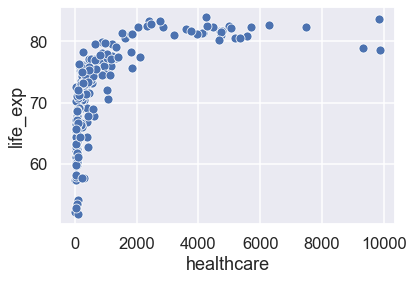

In [27]:
sns.scatterplot(x='healthcare', y='life_exp', data=df)

In [46]:
def log_vals(df, col):
    return df.assign(**{col: np.log(df[col])})

Text(0, 0.5, 'log(life_exp)')

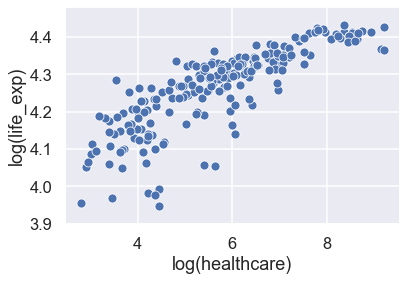

In [57]:
sns.scatterplot(x='healthcare', y='life_exp',
                data=(df.pipe(log_vals, 'healthcare')
                      .pipe(log_vals, 'life_exp')))
plt.xlabel('log(healthcare)')
plt.ylabel('log(life_exp)')

In [44]:
gun = pd.read_csv('gunpowder.txt', sep='\s+', header=None, names=['charge', 'elasticity'])
gun

,charge,elasticity
0,39,42.3
1,78,99.0
2,117,124.0
...,...,...
14,585,2565.2
15,624,3851.2
16,702,5962.5


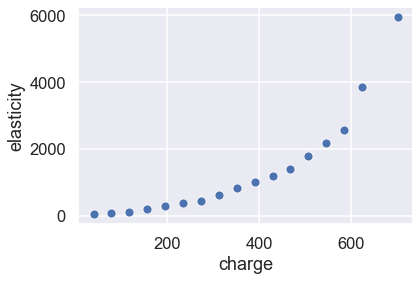

In [45]:
sns.scatterplot(x='charge', y='elasticity', data=gun)

Text(0, 0.5, 'log(elasticity)')

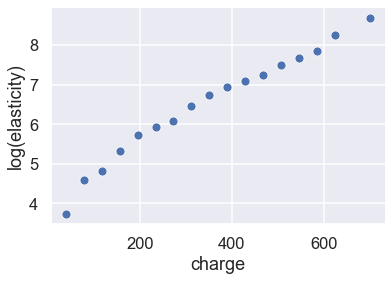

In [56]:
sns.scatterplot(x='charge', y='elasticity', data=gun.pipe(log_vals, 'elasticity'))
plt.ylabel('log(elasticity)')

In [52]:
ice = pd.read_csv('icecream.csv')
ice.columns

Index(['sampleID', 'sugar', 'fat', 'color', 'milky', 'buttery', 'vanilla',
       'eggy', 'almond', 'sweetness', 'cool', 'meltRate1', 'fatty', 'creamy',
       'fluffy', 'doughy', 'crystals', 'mouthcoat', 'hardness', 'tackiness',
       'meltRate2', 'DOLtexture', 'DOLflavor', 'DOLoverall'],
      dtype='object')

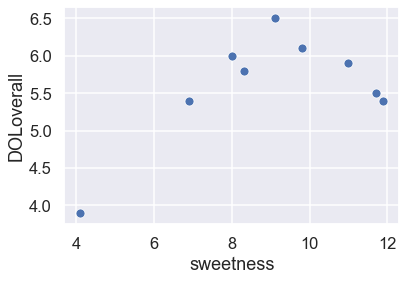

In [54]:
sns.scatterplot(x='sweetness', y='DOLoverall', data=ice)

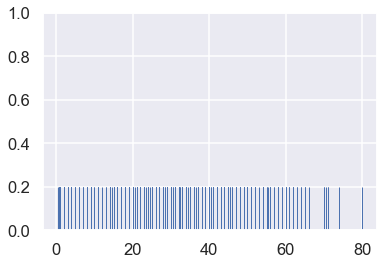

In [58]:
ti = sns.load_dataset('titanic')
ages = ti['age'].dropna()
sns.rugplot(ages, height=0.2)

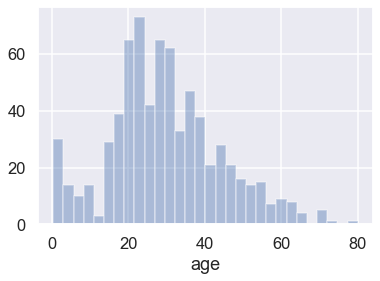

In [60]:
sns.distplot(ages, bins=30, kde=False)

In [83]:
def unif_kernel(x, scale=1):
    plt.plot([x - 1, x + 1], [scale, scale],
             [x-1, x-1], [0, scale],
             [x+1, x+1], [0, scale],
             c='b')

(0, 1.5)

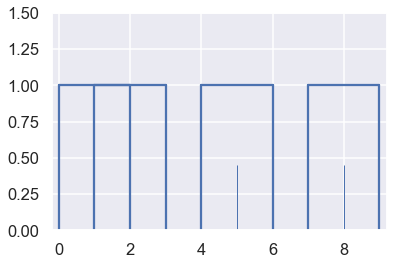

In [85]:
x = [1, 2, 5, 8]
sns.rugplot(x, height=0.3)
for i in x:
    unif_kernel(i)
plt.xlim(-.2, 9.2)
plt.ylim(0, 1.5)

(0, 1.5)

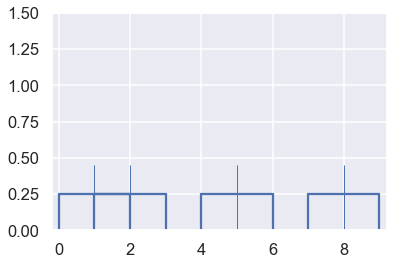

In [86]:
x = [1, 2, 5, 8]
sns.rugplot(x, height=0.3)
for i in x:
    unif_kernel(i, 0.25)
plt.xlim(-.2, 9.2)
plt.ylim(0, 1.5)

(0, 1.5)

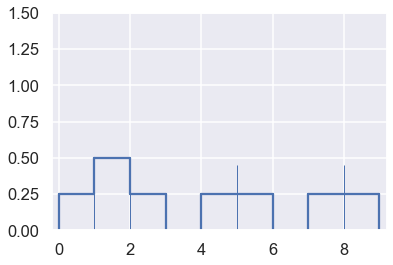

In [100]:
x = [1, 2, 5, 8]
s = 0.25
sns.rugplot(x, height=0.3)
plt.plot([0, 0], [0, s],
         [0, 1], [s, s],
         [1, 1], [s, 2*s],
         [1, 2], [2*s, 2*s],
         [2, 2], [2*s, s],
         [2, 3], [s, s],
         [3, 3], [s, 0],
         c='b')
unif_kernel(5, s)
unif_kernel(8, s)
plt.xlim(-.2, 9.2)
plt.ylim(0, 1.5)